# Implementacion en ```Python``` del modelo MA(q), su ACF y PACF

Implementacion MA(1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


import matplotlib as mpl
mpl.rc('lines', linewidth=0.5)


np.random.seed(1)
mu, sigma = 0, 1
N=1000
Z=np.random.normal(mu, sigma , N)

beta0=1
beta1 = 0.3
X=np.zeros(N)

# no hay ciclo
X = beta0*Z[:-1] + beta1*Z[1:]  # X_t = beta0 Z_t + beta1 X_{t-1}

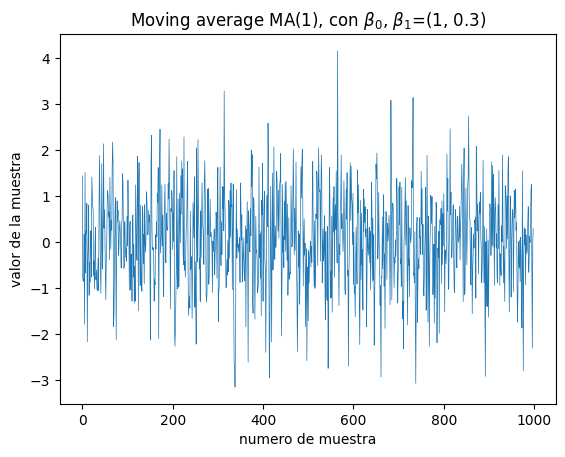

In [2]:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"Moving average MA(1), con $\\beta_0$, $\\beta_1$={beta0, beta1}")

plt.plot(X)


## ACF usando la funcion analitica

\begin{eqnarray}
\rho_{\tau} = 
\left \{ 
    \begin{array}{cc}
      \frac{\sum_{j=0}^{\text{q}-\tau} \beta_j \beta_{\tau + j}}{\sum_{j=0}^{\text{q}} \beta_j^2} & 0 \le \tau \le q \\
    0 & \tau > q
    \end{array}
    \right .
\end{eqnarray}

<StemContainer object of 3 artists>

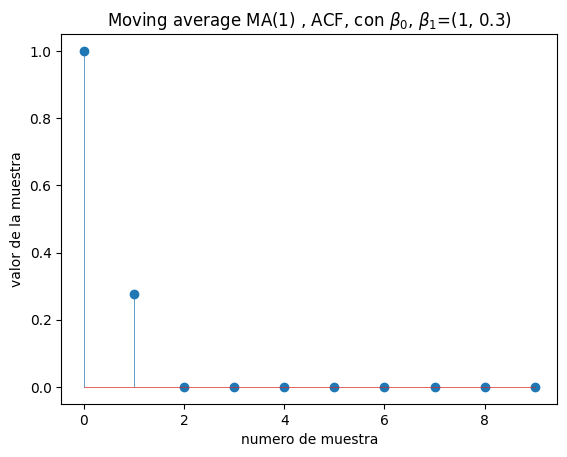

In [6]:
k=2
M=10
rhoA = np.zeros(M)
betavec = np.array([beta0, beta1])
betavec2 = betavec**2

SS = betavec2.sum()

rhoA[0]=1
for tau in range(1,k):
    rhoA[tau] = sum( betavec[j]*betavec[tau+j] for j in range(k-tau))/SS

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"Moving average MA(1) , ACF, con $\\beta_0$, $\\beta_1$={beta0, beta1}")

plt.stem(rhoA)

## ACF usando ```statsmodels```


<StemContainer object of 3 artists>

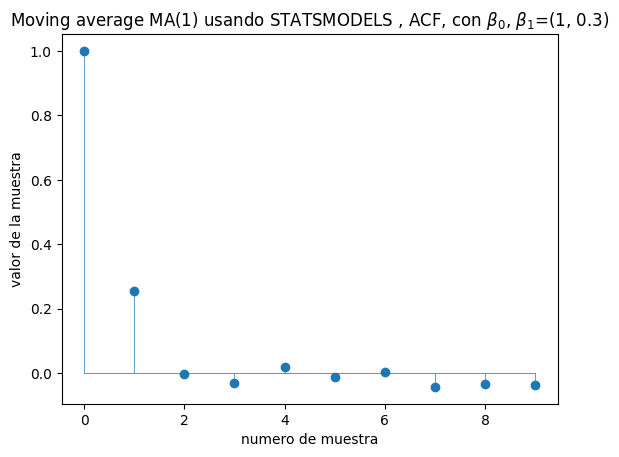

In [7]:
M=10
rho = sm.tsa.acf(X)[0:M]

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"Moving average MA(1) usando STATSMODELS , ACF, con $\\beta_0$, $\\beta_1$={beta0, beta1}")

plt.stem(rho)

<StemContainer object of 3 artists>

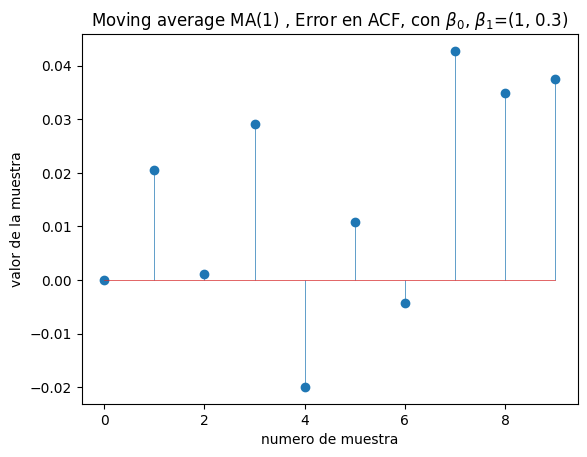

In [8]:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"Moving average MA(1) , Error en ACF, con $\\beta_0$, $\\beta_1$={beta0, beta1}")

plt.stem(rhoA-rho)

## PACF  analitico

\begin{eqnarray}
P_k =
&=& \frac{(-1)^{k+1} (\beta_1^2-1) \beta_1^k}{\beta_1^{2k + 2}-1 }
\end{eqnarray}

<StemContainer object of 3 artists>

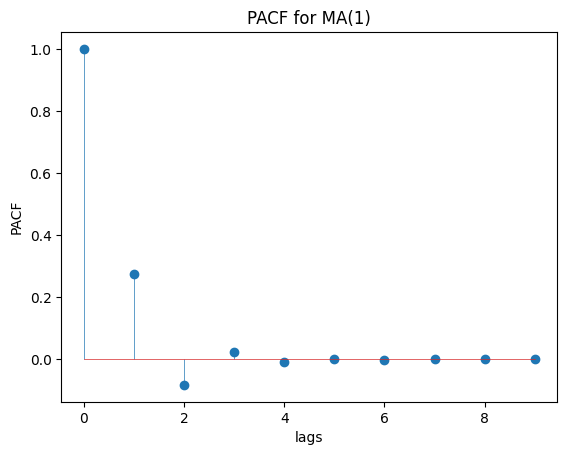

In [10]:
k=2 # no se necesita
M=10
rhoA= np.zeros(M)

rhoA[0]=1
for k in range(1, M):
    rhoA[k] = (-1)**(k+1)*(beta1**k*(beta1**2-1))/ ( beta1**(2*k+2) - 1)

# grafica
plt.title("PACF for MA(1)")
plt.xlabel("lags")
plt.ylabel("PACF")
plt.stem(rhoA)

## PACF usando ```statsmodels```

<StemContainer object of 3 artists>

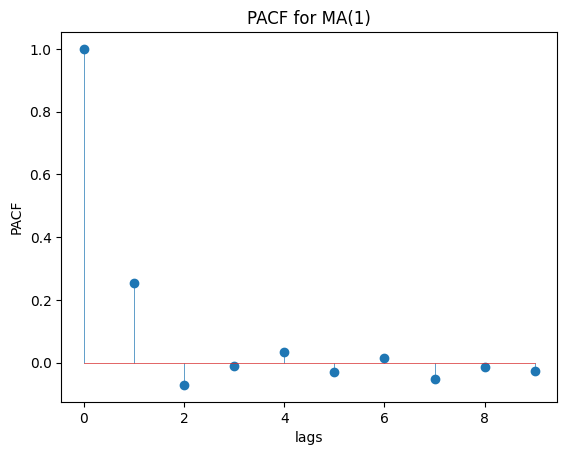

In [11]:
M=10 # otra vez
rho = sm.tsa.pacf(X)[0:M]

# grafica
plt.title("PACF for MA(1)")
plt.xlabel("lags")
plt.ylabel("PACF")
plt.stem(rho)

<StemContainer object of 3 artists>

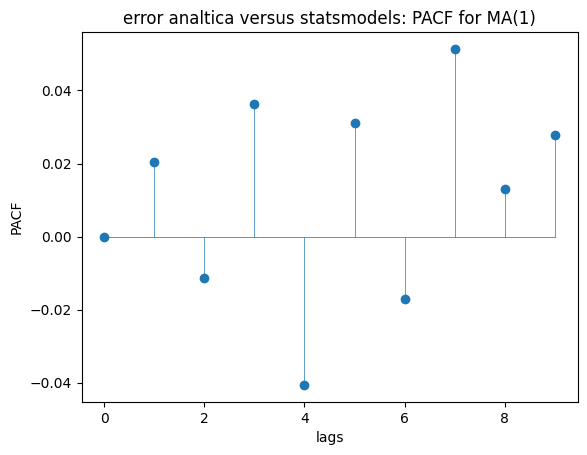

In [12]:
# error
# grafica error
plt.title("error analtica versus statsmodels: PACF for MA(1)")
plt.xlabel("lags")
plt.ylabel("PACF")
plt.stem(rhoA-rho)

## Ejemplo de un MA(3)

In [14]:
beta0=1
beta1=0.3
beta2=0.1
beta3=0.4
X=np.zeros(N)

# no for loop
X = beta0*Z[:-3] + beta1*Z[1:-2] + beta2*Z[2:-1] + beta3*Z[3:]

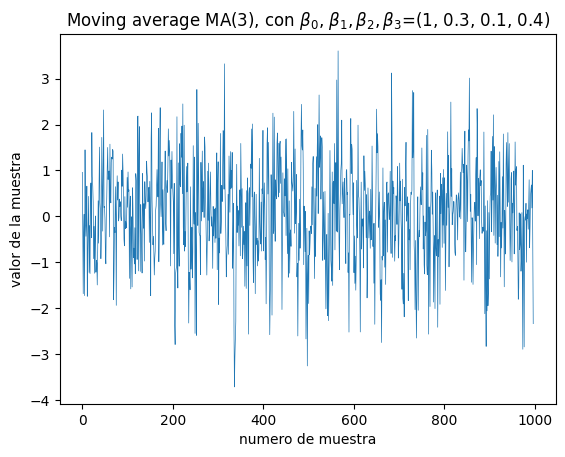

In [15]:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"Moving average MA(3), con $\\beta_0$, $\\beta_1, \\beta_2, \\beta_3$={beta0, beta1, beta2, beta3}")

plt.plot(X)


## ACF solucion analitica


<StemContainer object of 3 artists>

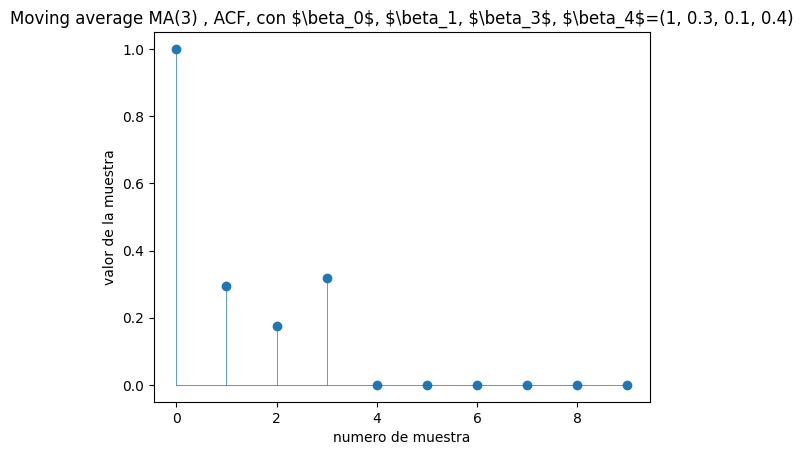

In [17]:
k=4
M=10
rhoA = np.zeros(M)
betavec = np.array([beta0, beta1, beta2, beta3])
betavec2 = betavec**2

SS = betavec2.sum()

rhoA[0]=1
for tau in range(1,k):
    rhoA[tau] = sum( betavec[j]*betavec[tau+j] for j in range(k-tau))/SS

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"Moving average MA(3) , ACF, con $\\beta_0$, $\\beta_1, $\\beta_3$, $\\beta_4$={beta0, beta1, beta2, beta3}")

plt.stem(rhoA)

### Usando ```statsmodels```

<StemContainer object of 3 artists>

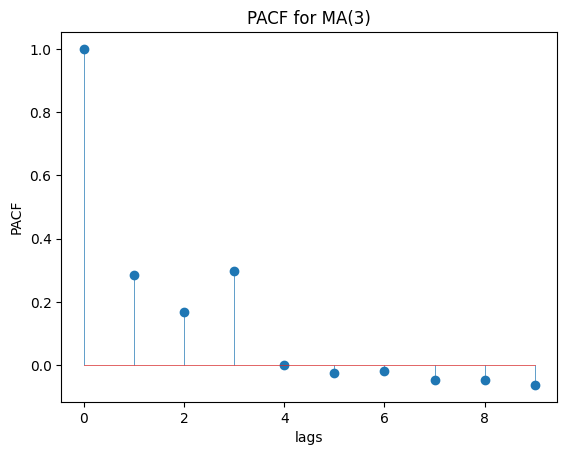

In [23]:
M=10 # otra vez
rho = sm.tsa.acf(X)[0:M]

# grafica
plt.title("PACF for MA(3)")
plt.xlabel("lags")
plt.ylabel("PACF")
plt.stem(rho)

<StemContainer object of 3 artists>

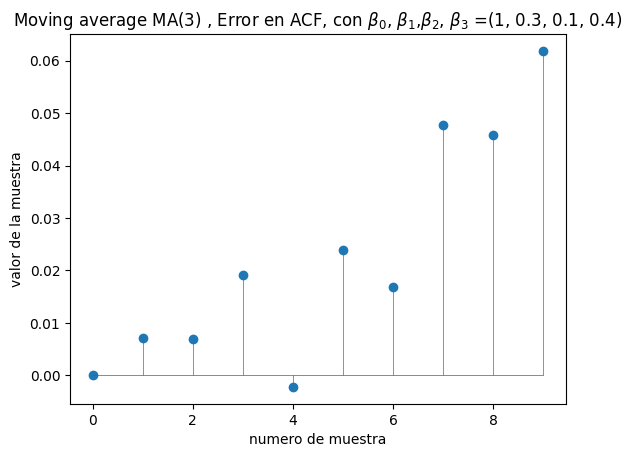

In [22]:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"Moving average MA(3) , Error en ACF, con $\\beta_0$, $\\beta_1$,$\\beta_2$, $\\beta_3$ ={beta0, beta1, beta2, beta3}")

plt.stem(rhoA-rho)

### Que pasa con el PACF de este MA(3)?
Ver apendice para esto. No cae en tareas. 

# Modelo ARMA(p,q):
El ARMA: Aregressive Moving Average  es un mixto (hibrido) de los anteriores. Si consideramos la posibilidad de p=0 o q=0, el ARMA(p,q) contiene a los anteriores. 

Una piensa por que no dejar solo los AR(p) o los MA(q)? Seria posible con un numero suficiente de coeficientes (p,q) ajustar cualesquiera de los anteriores a mis datos?  

R. Es probable que pero esto va en contra del [principio de parsimonia](https://www.oxfordreference.com/display/10.1093/oi/authority.20110803100346221;jsessionid=BC6AE186967141EDAC4BE86B554B935C) , el cual dice que de dos (o mas) modelos que representen el mismo problema, el mas simple es el mejor. "La belleza esta en la simplicidad" y por eso el ARMA(p,q) podria ser una representacion de mis datos mas simple que el AR(p) o el MA(q). 

## Matematicamente:

El modelo ARMA(p,q) es una combinacion de ambos como sigue


$$X_t = Z_t + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \beta_1 Z_{t-1} + \beta_2 Z_{t-2} + \cdots \beta_q Z_{t-q}$$

Donde $c=0$, $\beta_0=1$.

Escribamos esto en terminos de "backshifts".

$$(1 - \phi_1 B - \phi B^2 - \cdots - \phi_p B^p) X_t = (1 + \beta_1 B + \beta_2 B^2 + \cdots + \beta_q B^q) Z_t $$

En forma polinomica esto es:
$$p(B) = 1 - \phi_1 B - \phi_2 B^2 - \cdots  - \phi_p B^p $$
$$ q(B) = 1 - \beta_1 B - \beta_2 B^2 - \cdots - \beta_q B^q $$

y tenemos

$$ p(B) X_t = q(B) Z_t. $$

Podemos resolver por uno en terminos del otro de la siguiente forma


$$ X_t = \frac{q(B)}{p(B)} Z_t \quad Z_t = \frac{p(B)}{q(B)} X_t  $$
Esto se debe convertir a series (finitas o infinitas).
No queremos que ni $p(B)$ ni $q(B)$ sean 0. Claro que si sus raices estan por fuera del circulo unitario  no son .  Esto para
la convergencia de las series. 


## Estadisticas del modelo ARMA(p,q)
### La media: Se la dejamos al estudiante.
### La ACF.

$$X_t = Z_t + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \beta_1 Z_{t-1} + \beta_2 Z_{t-2} + \cdots \beta_q Z_{t-q}$$

Necesitamos calcular la esperanza de $X_t X_{t-\tau}$.

$$X_t X_{t-\tau}=  Z_t X_{t-\tau} + \phi_1 X_{t-1} X_{t-\tau}+ \phi_2 X_{t-2} X_{t-\tau} + \cdots + \phi_p X_{t-p} X_{t- \tau} + \beta_1 Z_{t-1} X_{t-\tau}+ \beta_2 Z_{t-2} X_{t-\tau}+ \cdots \beta_q Z_{t-q} X_{t - \tau} $$

Para calcular la esperanza de todo esto usamos las siguimetes identidades

$$\mathbb{E}[ \alpha Z_{t-i} X_{t-\tau}] = \alpha \mathbb{E}[Z_{t-i} X_{t - \tau}] = 0 \quad , \quad \text{simpre que   } \tau > i . $$

$$ \mathbb{E}[\phi_i X_{t-i} X_{t-\tau}] =\phi_i \gamma_{\tau - i} $$

De forma  que

$$ \gamma_{\tau} = \sum_{i=1}^p \phi_i \gamma_{\tau - i}  \quad , \quad \text{simpre que   } \tau \ge q+1. $$

Para hallar la ACF toca normalizar la correlacion $\gamma_i$ divididiendo por $\gamma_0$. $\rho_i = \gamma_i/\gamma_0$, asi que

$$ \rho_{\tau} = \sum_{i=1}^{\mathrm{p}} \phi_i \rho_{\tau - i} . $$
No es explicita.  Se representar recursivamente, pero no es analitica.

Asumimos tambien que $\tau  \ge q+1$ . Que pasa para $0 \le \tau \le q$? no lo consideramos aca.


### Ejemplo de un ARMA(1,1):
Consideramos

$$X_{\tau} = Z_t + \phi_1 X_{t-1} + \beta_1 Z_{t-1} $$
con $c=0, \beta_0=1$. Halle la funcion de autocorrelacion ACF
para este caso.

